# General Knowledge of API

APIs, or Application Programming Interfaces, play a pivotal role in modern software development by facilitating communication and data exchange between different systems. They serve as bridges that allow applications to interact with each other seamlessly, enabling the creation of more robust and interconnected software.

APIs come in various forms, each serving specific purposes in the realm of software development. Let's explore some fundamental concepts:

- **Question 1:** *Name three types of API protocols. Briefly explain the primary use of each.*

  - SOAP

  - REST

  - g(RCP)

  

- **Question 2:** *What are the HTTP response code families? And what do they mean?*

  - 1XX -> Informational responses
  - 2XX -> Successful responses
  - 3XX -> Redirection messages
  - 4XX -> Client error responses
  - 5XX -> Server error responses

  Understanding these families helps developers diagnose and troubleshoot issues during API interactions.

- **Question 3:** *What do the HTTP response codes 201, 401, and 404 mean?*

  - **201:** Created
  - **401:** Unauthorized
  - **404:** Not Found

- **Question 4:** *Name the 4 basic HTTP verbs.*

  - GET
  - POST
  - PUT
  - DELETE
  - PATH

- **Question 5:** *Explain the difference between PUT and PATCH?*

  - **PUT:** : Modify a resource entirely

  - **PATCH:** : Partially modify a resource

- **Question 6:** *Name at least two data formats commonly used in API exchanges.*

  - JSON

  - XML

- **Question 7:** *How can you verify the validity of a resource without getting the entire response?*

  - HTTP HEAD REQUESTS

- **Question 8:** *What are the main concepts of REST? (name them)*

  - Stateless
  - Client-server
  - Layered System
  - Casheable

- **Question 9:** *Can you explain one of the main concepts of your choice from among those you mention? (Give an example if possible)*

  - In a stateless architecture, every client request sent to the server must contain all the information necessary to process it. The server does not retain any memory of previous interactions with the client. Each request is treated as an independent transaction.



In the subsequent sections, we will delve into practical exercises to apply and deepen our understanding of these concepts using SOAP, REST, and GraphQL APIs.


--------------------------

# Exploring SOAP APIs

### Few elements to remember about the SOAP Protocol

The SOAP protocol, which means Simple Object Access Protocol, is one of the earliest web service protocols. SOAP is an XML-based protocol and was designed to provide a platform/language-independent way to exchange data between different systems over the internet.

### Key Concepts in SOAP:

- **XML-Based Structure:** SOAP messages are structured using XML, making them both human-readable and machine-readable. This structure allows for the encapsulation of data and its transport between systems.

- **Platform and Language Independence:** One of the core objectives of SOAP is to provide a communication method that is independent of the underlying platform or programming language. This promotes interoperability between diverse systems.

- **Message Format:** SOAP messages consist of an envelope that defines the message structure and rules for processing, a set of encoding rules for data types, and conventions for representing remote procedure calls.

- **Transport Neutrality:** SOAP can be used with various transport protocols, including HTTP, SMTP, and more. This flexibility in transport makes it adaptable to different network environments.

### Objective

Obtain and display the capital of the Canada corresponding to the ISO code "CA" using the following SOAP API. 
Step by step guide :

- **Step 1:** Examine the XML structure of the SOAP request provided. Identify the tag name that contains the ISO country code and the tag that will return the capital name.

- **Step 2:** Modify the existing SOAP request to use the ISO code "CA" isntead of "FR". Ensure that the XML structure remains correct.

- **Step 3:** Use the modified request to send a request to the SOAP services at the specified URL.

- **Step 4:** Analyze the response received. Extract and display the capital name from the SOAP response.

- **Step 5:** Remove sections of code that are not necessary to achieve this objective, in order to simply the script.


### Documentation link :

- https://www.postman.com/cs-demo/workspace/postman-customer-org-s-public-workspace/documentation/8854915-43f6a9be-0c65-4486-bfdf-36b6548161dd?entity=request-96a53688-6305-45be-ab8b-ca1d1c88f830
- https://docs.insomnia.rest/

In [1]:
import requests
# SOAP request URL
url = "http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso"

# structured XML
payload = """<soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/">
                <soap:Body>
                    <CapitalCity xmlns="http://www.oorsprong.org/websamples.countryinfo">
                        <sCountryISOCode>US</sCountryISOCode>
                    </CapitalCity>
                </soap:Body>
                </soap:Envelope>"""
# headers
headers = {
    'Content-Type': 'text/xml; charset=utf-8'
}
# POST request
response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)

<?xml version="1.0" encoding="utf-8"?>
<soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/">
  <soap:Body>
    <m:CapitalCityResponse xmlns:m="http://www.oorsprong.org/websamples.countryinfo">
      <m:CapitalCityResult>Washington</m:CapitalCityResult>
    </m:CapitalCityResponse>
  </soap:Body>
</soap:Envelope>


### Step 1:
The <m:CapitalCityResult> tag contains the value of the capital city ("Washington")

### Step 2:

In [21]:
import requests
# SOAP request URL
url = "http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso"

# structured XML
payload = """<soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/">
                <soap:Body>
                    <CapitalCity xmlns="http://www.oorsprong.org/websamples.countryinfo">
                        <sCountryISOCode>CA</sCountryISOCode>
                    </CapitalCity>
                </soap:Body>
                </soap:Envelope>"""
# headers
headers = {
    'Content-Type': 'text/xml; charset=utf-8'
}
# POST request
response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)

<?xml version="1.0" encoding="utf-8"?>
<soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/">
  <soap:Body>
    <m:CapitalCityResponse xmlns:m="http://www.oorsprong.org/websamples.countryinfo">
      <m:CapitalCityResult>Ottawa</m:CapitalCityResult>
    </m:CapitalCityResponse>
  </soap:Body>
</soap:Envelope>


### Step 3

In [22]:
import requests

# URL for the SOAP API
url = "http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso"

# SOAP request body with ISO code "CA"
soap_request = """<soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/" xmlns:ns="http://www.oorsprong.org/websamples.countryinfo">
   <soap:Body>
      <ns:CapitalCity>
         <ns:sCountryISOCode>CA</ns:sCountryISOCode>
      </ns:CapitalCity>
   </soap:Body>
</soap:Envelope>"""

# Headers for the request
headers = {
    "Content-Type": "text/xml; charset=utf-8",
    "SOAPAction": "http://www.oorsprong.org/websamples.countryinfo/CapitalCity"
}

# Send the POST request
response = requests.post(url, data=soap_request, headers=headers)

# Print raw response for debugging
print(response.text)


<?xml version="1.0" encoding="utf-8"?>
<soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/">
  <soap:Body>
    <m:CapitalCityResponse xmlns:m="http://www.oorsprong.org/websamples.countryinfo">
      <m:CapitalCityResult>Ottawa</m:CapitalCityResult>
    </m:CapitalCityResponse>
  </soap:Body>
</soap:Envelope>


### Step 4:

In [ ]:
import xml.etree.ElementTree as ET

root = ET.fromstring(response.content)
namespace = {"m": "http://www.oorsprong.org/websamples.countryinfo"}
capital = root.find(".//m:CapitalCityResult", namespaces=namespace)

if capital is not None:
    print(f"The capital of Canada (ISO: CA) is: {capital.text}")
else:
    print("Capital not found in the response.")


The capital of Canada (ISO: CA) is: Ottawa


### Step 5:

In [24]:
import requests
import xml.etree.ElementTree as ET

# SOAP API URL
url = "http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso"

# SOAP Request
soap_request = """<soap:Envelope xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/" xmlns:ns="http://www.oorsprong.org/websamples.countryinfo">
   <soap:Body>
      <ns:CapitalCity>
         <ns:sCountryISOCode>CA</ns:sCountryISOCode>
      </ns:CapitalCity>
   </soap:Body>
</soap:Envelope>"""

# Headers
headers = {
    "Content-Type": "text/xml; charset=utf-8",
    "SOAPAction": "http://www.oorsprong.org/websamples.countryinfo/CapitalCity"
}

# Send Request
response = requests.post(url, data=soap_request, headers=headers)

# Parse Response
root = ET.fromstring(response.content)
namespace = {"m": "http://www.oorsprong.org/websamples.countryinfo"}
capital = root.find(".//m:CapitalCityResult", namespaces=namespace)

# Display Capital
if capital is not None:
    print(f"The capital of Canada (ISO: CA) is: {capital.text}")
else:
    print("Capital not found.")


The capital of Canada (ISO: CA) is: Ottawa


--------------------------

# REST API Exercise: Star Wars Information Retrieval

### Introduction 

In the exercice, you will explore the Star Wars API (SWAPI) to retrieve and analyze data related to Star Wars characters, films and planets. The SWAPI API is a RESTful web service that provideinformation about Star Wars universe, accessible through various endpoints.\
This exercice is designed to enhance your understanding of working with RESTful APIs, feel free to ask me if you have any question. Each task will build on the previous one so don't hesitate if you are blocked. Make sure to handle bad response code.

### Few elements to remember about the REST Protocol

REST (Representational State Transfer) is an architectural style for designing networked applications. RESTful APIs (Application Programming Interfaces) conform to the principles of REST, allowing systems to communicate over HTTP in a stateless manner; Some important aspects are:

- **Resources:** Everything is a resource, identified by a unique URI.

- **HTTP Methods:** CRUD operations are performed using standard HTTP methods (GET, POST, PUT, DELETE).

- **Stateless:** Each request from a client contains all the information needed to understand and fulfill the request.

### Key Concepts in REST:

- **Endpoint:** A specific URI representing a resource. Endpoints are URLs that define where resources can be accessed.

- **Basic HTTP Methods:** One of the core objectives of SOAP is to provide a communication method that is independent of the underlying platform or programming language. This promotes interoperability between diverse systems.
    - **GET:** Retrieve data from a specified resource.
    - **POST:** Submit data to be processed to a specified resource.
    - **PUT:** Update a resource.
    - **DELETE:** Delete a resource.

- **Request and Response:**
    - **Request:** The client's message to the server, including the HTTP method, headers, and optional data.
    - **Response:** The server's reply to the client's request, containing status information and, optionally, data.


### Objective

- **Step 1: Introduction:** Find some informations about the SWAPI API : the base URL, the Rate limiting and How to auhtenticate. Find information on all available resources withing this API with a request.

- **Step 2: Retrieve Character Information:** Retrieve all characters informations (name, gender, height, ...).

- **Step 3: Retrieve Film Information:** Retrieve all films informations (title, director, release date, ...).

- **Step 4: Retrieve Planet Information:** Retrieve all planets informations (name, population, climate, ...).

- **Step 5: Search and Display:** Create a function to search for and display information about a specific character based on its name. Be sure to handle cases of bad queries and to make at least three unittests with an understandable name.

- **Step 6: Advanced Query:** Store in a pandas dataframe all informations about all the characters of the film you want. Group the characters by species at the end.

- **Step 7: Data Analysis:** Create an advanced query to retrieve information on all the films, and find a way to rank them according to the number of characters in the film.  

- **Step 8 bonus: Additional Endpoint:** Explore an additional endpoint and make a request to display relevant information. For exemple to retrieve starship or vehicles informations.


### Documentation link :

- https://swapi.dev/documentation

In [2]:
url = "https://swapi.dev/api/"
response = requests.get(url)
resources = response.json()
print(resources)

{'people': 'https://swapi.dev/api/people/', 'planets': 'https://swapi.dev/api/planets/', 'films': 'https://swapi.dev/api/films/', 'species': 'https://swapi.dev/api/species/', 'vehicles': 'https://swapi.dev/api/vehicles/', 'starships': 'https://swapi.dev/api/starships/'}


### Step 2

In [ ]:
base_url = "https://swapi.dev/api/people/"

response = requests.get(base_url)
data = response.json()

for person in data['results']:
    print(f"Name: {person['name']}, Gender: {person['gender']}, Height: {person['height']}")


Name: Luke Skywalker, Gender: male, Height: 172
Name: C-3PO, Gender: n/a, Height: 167
Name: R2-D2, Gender: n/a, Height: 96
Name: Darth Vader, Gender: male, Height: 202
Name: Leia Organa, Gender: female, Height: 150
Name: Owen Lars, Gender: male, Height: 178
Name: Beru Whitesun lars, Gender: female, Height: 165
Name: R5-D4, Gender: n/a, Height: 97
Name: Biggs Darklighter, Gender: male, Height: 183
Name: Obi-Wan Kenobi, Gender: male, Height: 182


### Step 3

In [ ]:
response = requests.get("https://swapi.dev/api/films/")
films = response.json()

for film in films['results']:
    print(f"Title: {film['title']}, Director: {film['director']}, Release Date: {film['release_date']}")


Title: A New Hope, Director: George Lucas, Release Date: 1977-05-25
Title: The Empire Strikes Back, Director: Irvin Kershner, Release Date: 1980-05-17
Title: Return of the Jedi, Director: Richard Marquand, Release Date: 1983-05-25
Title: The Phantom Menace, Director: George Lucas, Release Date: 1999-05-19
Title: Attack of the Clones, Director: George Lucas, Release Date: 2002-05-16
Title: Revenge of the Sith, Director: George Lucas, Release Date: 2005-05-19


### Step 4

In [ ]:
response = requests.get("https://swapi.dev/api/planets/")
planets = response.json()

for planet in planets['results']:
    print(f"Name: {planet['name']}, Population: {planet['population']}, Climate: {planet['climate']}")


Name: Tatooine, Population: 200000, Climate: arid
Name: Alderaan, Population: 2000000000, Climate: temperate
Name: Yavin IV, Population: 1000, Climate: temperate, tropical
Name: Hoth, Population: unknown, Climate: frozen
Name: Dagobah, Population: unknown, Climate: murky
Name: Bespin, Population: 6000000, Climate: temperate
Name: Endor, Population: 30000000, Climate: temperate
Name: Naboo, Population: 4500000000, Climate: temperate
Name: Coruscant, Population: 1000000000000, Climate: temperate
Name: Kamino, Population: 1000000000, Climate: temperate


### Step 5

In [8]:
def search_character(name):
    url = f"https://swapi.dev/api/people/?search={name}"
    response = requests.get(url)
    
    if response.status_code == 200:
        results = response.json()['results']
        if results:
            for character in results:
                print(f"Name: {character['name']}, Gender: {character['gender']}, Height: {character['height']}")
        else:
            print("Character not found.")
    else:
        print(f"Error: {response.status_code}")

search_character("Luke Skywalker")


Name: Luke Skywalker, Gender: male, Height: 172


### Step 6

In [42]:
import requests
import pandas as pd

film_url = "https://swapi.dev/api/films/3/"
response = requests.get(film_url)
film_data = response.json()

characters = []
for character_url in film_data['characters']:
    character_response = requests.get(character_url)
    characters.append(character_response.json())

df = pd.DataFrame(characters)
df['species'] = df['species'].apply(lambda x: x[0] if x else 'Unknown')


species_names = {}
for species_url in df['species'].unique():
    if species_url != 'Unknown': 
        species_response = requests.get(species_url)
        if species_response.status_code == 200:
            species_data = species_response.json()
            species_names[species_url] = species_data['name']
        else:
            species_names[species_url] = "Unknown"
    else:
        species_names[species_url] = "Unknown"

df['species_name'] = df['species'].map(species_names)


print("\nCharacters and Their Characteristics:\n")
for _, row in df.iterrows():
    display(f"Name: {row['name']}, Gender: {row['gender']}, Height: {row['height']}, "
          f"Mass: {row['mass']}, Species: {row['species_name']}")

# Group by species name and count
species_counts = df.groupby('species_name').size()

# Print the grouped counts
print("\nNumber of Characters by Species:\n")
display(species_counts)



Characters and Their Characteristics:



'Name: Luke Skywalker, Gender: male, Height: 172, Mass: 77, Species: Unknown'

'Name: C-3PO, Gender: n/a, Height: 167, Mass: 75, Species: Droid'

'Name: R2-D2, Gender: n/a, Height: 96, Mass: 32, Species: Droid'

'Name: Darth Vader, Gender: male, Height: 202, Mass: 136, Species: Unknown'

'Name: Leia Organa, Gender: female, Height: 150, Mass: 49, Species: Unknown'

'Name: Obi-Wan Kenobi, Gender: male, Height: 182, Mass: 77, Species: Unknown'

'Name: Chewbacca, Gender: male, Height: 228, Mass: 112, Species: Wookie'

'Name: Han Solo, Gender: male, Height: 180, Mass: 80, Species: Unknown'

'Name: Jabba Desilijic Tiure, Gender: hermaphrodite, Height: 175, Mass: 1,358, Species: Hutt'

'Name: Wedge Antilles, Gender: male, Height: 170, Mass: 77, Species: Unknown'

"Name: Yoda, Gender: male, Height: 66, Mass: 17, Species: Yoda's species"

'Name: Palpatine, Gender: male, Height: 170, Mass: 75, Species: Unknown'

'Name: Boba Fett, Gender: male, Height: 183, Mass: 78.2, Species: Unknown'

'Name: Lando Calrissian, Gender: male, Height: 177, Mass: 79, Species: Unknown'

'Name: Ackbar, Gender: male, Height: 180, Mass: 83, Species: Mon Calamari'

'Name: Mon Mothma, Gender: female, Height: 150, Mass: unknown, Species: Unknown'

'Name: Arvel Crynyd, Gender: male, Height: unknown, Mass: unknown, Species: Unknown'

'Name: Wicket Systri Warrick, Gender: male, Height: 88, Mass: 20, Species: Ewok'

'Name: Nien Nunb, Gender: male, Height: 160, Mass: 68, Species: Sullustan'

"Name: Bib Fortuna, Gender: male, Height: 180, Mass: unknown, Species: Twi'lek"


Number of Characters by Species:



species_name
Droid              2
Ewok               1
Hutt               1
Mon Calamari       1
Sullustan          1
Twi'lek            1
Unknown           11
Wookie             1
Yoda's species     1
dtype: int64

### Step 7

In [15]:
response = requests.get("https://swapi.dev/api/films/")
films = response.json()

film_character_counts = []
for film in films['results']:
    film_character_counts.append({
        "title": film['title'],
        "character_count": len(film['characters'])
    })

# Trier par nombre de personnages
film_character_counts = sorted(film_character_counts, key=lambda x: x['character_count'], reverse=True)
for film in film_character_counts:
    print(f"Title: {film['title']}, Characters: {film['character_count']}")


Title: Attack of the Clones, Characters: 40
Title: The Phantom Menace, Characters: 34
Title: Revenge of the Sith, Characters: 34
Title: Return of the Jedi, Characters: 20
Title: A New Hope, Characters: 18
Title: The Empire Strikes Back, Characters: 16


### Step 8

In [17]:
response = requests.get("https://swapi.dev/api/starships/")
starships = response.json()

# Afficher les informations sur les vaisseaux
for starship in starships['results']:
    print(f"Name: {starship['name']}, Model: {starship['model']}, Manufacturer: {starship['manufacturer']}")


Name: CR90 corvette, Model: CR90 corvette, Manufacturer: Corellian Engineering Corporation
Name: Star Destroyer, Model: Imperial I-class Star Destroyer, Manufacturer: Kuat Drive Yards
Name: Sentinel-class landing craft, Model: Sentinel-class landing craft, Manufacturer: Sienar Fleet Systems, Cyngus Spaceworks
Name: Death Star, Model: DS-1 Orbital Battle Station, Manufacturer: Imperial Department of Military Research, Sienar Fleet Systems
Name: Millennium Falcon, Model: YT-1300 light freighter, Manufacturer: Corellian Engineering Corporation
Name: Y-wing, Model: BTL Y-wing, Manufacturer: Koensayr Manufacturing
Name: X-wing, Model: T-65 X-wing, Manufacturer: Incom Corporation
Name: TIE Advanced x1, Model: Twin Ion Engine Advanced x1, Manufacturer: Sienar Fleet Systems
Name: Executor, Model: Executor-class star dreadnought, Manufacturer: Kuat Drive Yards, Fondor Shipyards
Name: Rebel transport, Model: GR-75 medium transport, Manufacturer: Gallofree Yards, Inc.


### Postman a powerfull tool for

--------------------------

# Exploring GraphQL APIs

Usefull links:
- https://graphql.org/learn/queries/
- https://graphql-demo.mead.io/

Use this graphQL API to make complex requests on Star Wars world:
- https://swapi-graphql.netlify.app/

On the below cell you have a simple graphQL query.

# Exploring Star Wars Data with GraphQL

### Introduction 

In this exercice you will retrieve the previous results in another way, by consuming the GraphQL API of SWAPI.

### Few elements to remember about the GraphQL Protocol

GraphQL is a powerful query language for APIs that provides a more efficient and flexible alternative to traditional REST APIs. In this exercise, we will interact with the Star Wars API (SWAPI) using GraphQL to retrieve specific information about characters, films, and species from the Star Wars universe. Some important aspects are:

- **Single Endpoint:** GraphQL APIs typically have a single endpoint for all queries, making it more straightforward to manage and interact with.

- **Flexible Responses:** Clients receive exactly the data they request, reducing over-fetching of data common in traditional REST APIs.

- **Introspection:** GraphQL supports introspection, allowing clients to query the schema itself, making it self-documenting and aiding in development.

### Key Concepts in GraphQL:

- **GraphQL Schema:** GraphQL APIs have a schema that defines the types of data available and the relationships between them.

- **Queries:** In GraphQL, clients specify the exact data they need using queries, allowing for more efficient data retrieval.

- **Fields and Nested Structures:** Queries can include specific fields, and GraphQL supports nested structures to retrieve related data in a single request.


### Objective

- **Step 1: Introduction:** Understand the REST API Query. You can use the playground for this : https://swapi-graphql.netlify.app/?query=%7B%0A%20%20allFilms%20%7B%0A%20%20%20%20edges%20%7B%0A%20%20%20%20%20%20node%20%7B%0A%20%20%20%20%20%20%20%20id%2C%0A%20%20%20%20%20%20%20%20title%0A%20%20%20%20%20%20%7D%0A%20%20%20%20%7D%0A%20%20%7D%0A%7D

- **Step 2: Retrieve Films with Character Information:** Retrieve Films with Character Information in a single query.


### Documentation link :

- https://swapi.dev/documentation

### Step 1:
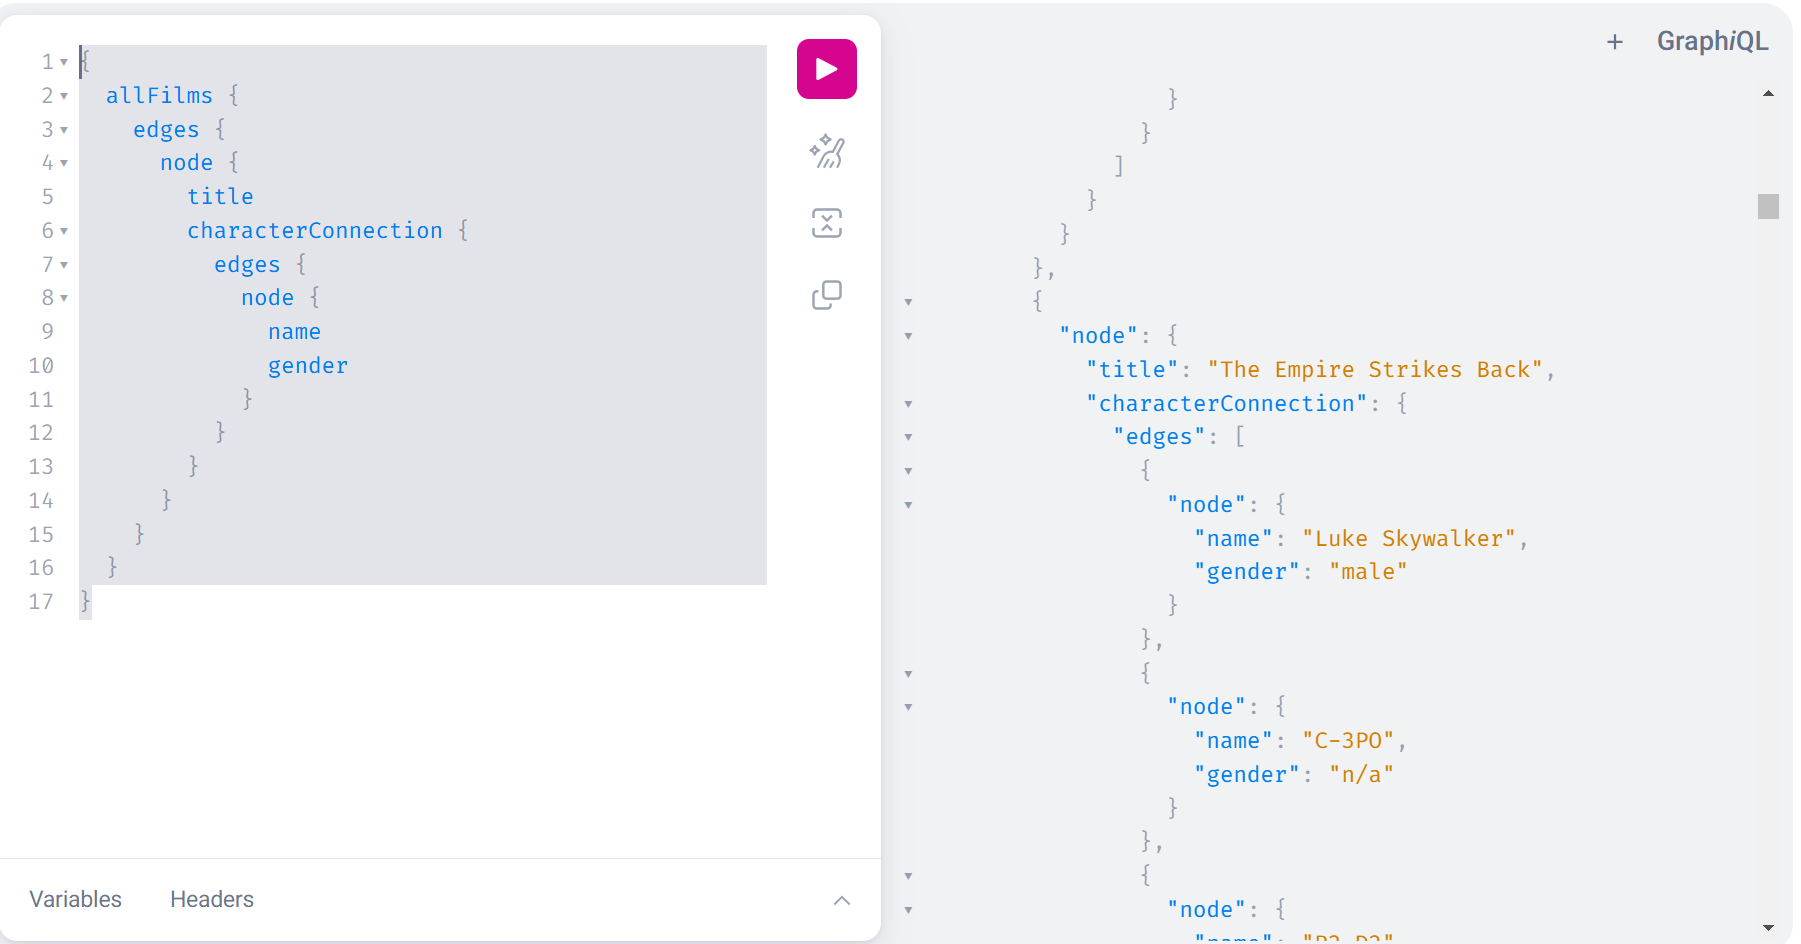

### Step 2:

In [33]:
import requests

url = "https://swapi-graphql.netlify.app/.netlify/functions/index"
body = """
query {
  allFilms {
    edges {
      node {
        title
        characterConnection {
          edges {
            node {
              name
              gender
            }
          }
        }
      }
    }
  }
}
"""

response = requests.get(url=url, json={"query": body})

print("Response status code:", response.status_code)

if response.status_code == 200:
    data = response.json()
    
    # Format and print the response
    print("\nFilms and Characters:")
    for film in data["data"]["allFilms"]["edges"]:
        title = film["node"]["title"]
        print(f"\nFilm: {title}")
        print("Characters:")
        for character in film["node"]["characterConnection"]["edges"]:
            char_info = character["node"]
            name = char_info["name"]
            gender = char_info["gender"]
            print(f"  - Name: {name}, Gender: {gender}")
else:
    print(f"Error: Unable to fetch data. Status code: {response.status_code}")

Response status code: 200

Films and Characters:

Film: A New Hope
Characters:
  - Name: Luke Skywalker, Gender: male
  - Name: C-3PO, Gender: n/a
  - Name: R2-D2, Gender: n/a
  - Name: Darth Vader, Gender: male
  - Name: Leia Organa, Gender: female
  - Name: Owen Lars, Gender: male
  - Name: Beru Whitesun lars, Gender: female
  - Name: R5-D4, Gender: n/a
  - Name: Biggs Darklighter, Gender: male
  - Name: Obi-Wan Kenobi, Gender: male
  - Name: Wilhuff Tarkin, Gender: male
  - Name: Chewbacca, Gender: male
  - Name: Han Solo, Gender: male
  - Name: Greedo, Gender: male
  - Name: Jabba Desilijic Tiure, Gender: hermaphrodite
  - Name: Wedge Antilles, Gender: male
  - Name: Jek Tono Porkins, Gender: male
  - Name: Raymus Antilles, Gender: male

Film: The Empire Strikes Back
Characters:
  - Name: Luke Skywalker, Gender: male
  - Name: C-3PO, Gender: n/a
  - Name: R2-D2, Gender: n/a
  - Name: Darth Vader, Gender: male
  - Name: Leia Organa, Gender: female
  - Name: Obi-Wan Kenobi, Gender: m

---------------------------